In [1]:
import numpy
import tqdm
import wendy
%pylab inline
import matplotlib.animation as animation
from IPython.display import HTML
rcParams.update({'axes.labelsize': 17.,
              'font.size': 12.,
              'legend.fontsize': 17.,
              'xtick.labelsize':15.,
              'ytick.labelsize':15.,
              'text.usetex': True,
              'figure.figsize': [5,5],
              'xtick.major.size' : 4,
              'ytick.major.size' : 4,
              'xtick.minor.size' : 2,
              'ytick.minor.size' : 2,
              'legend.numpoints':1})
_SAVE_GIFS= False
numpy.random.seed(2)

Populating the interactive namespace from numpy and matplotlib


# Phase-mixing and violent relaxation in one dimension

We study gravitational collapse in one dimension, illustrating *phase mixing* and *violent relaxation* using the setup of [Binney (2004)](http://adsabs.harvard.edu/abs/2004MNRAS.350..939B) and [Schulz et al. (2013)](http://adsabs.harvard.edu/abs/2013MNRAS.431...49S). We start with a grid of particles on a uniform grid in $x$ with a small velocity perturbation

$x \sim [-\pi/2,\pi/2]\,,$

$v = -V_0\,\sin(x)+\epsilon\,V_0\,\mathcal{N}(0,1)\,,$

where we also add a very small $\epsilon \approx10^{-7}$ additional perturbation to the velocities to avoid numerical instabilities. We integrate this system with $N = 1001$ particles for $\approx132$ time steps:

In [2]:
N= 1001
dx= numpy.pi
V0= 0.001

x= dx*(numpy.arange(N)-N//2)/N
v= -V0*numpy.sin(x)+numpy.random.normal(size=N)*V0*10.**-7.
m= numpy.ones(N)/float(N)

In [3]:
g= wendy.nbody(x,v,m,0.05,maxcoll=100000000)

In [4]:
nt= 2700
xt= numpy.empty((N,nt+1))
vt= numpy.empty((N,nt+1))
Et= numpy.empty((nt+1))
xt[:,0]= x
vt[:,0]= v
Et[0]= wendy.energy(x,v,m)
for ii in tqdm.trange(nt):
    tx,tv= g.next()
    xt[:,ii+1]= tx
    vt[:,ii+1]= tv
    Et[ii+1]= wendy.energy(tx,tv,m)

First, we check that the total energy is conserved during the $N$-body integration:

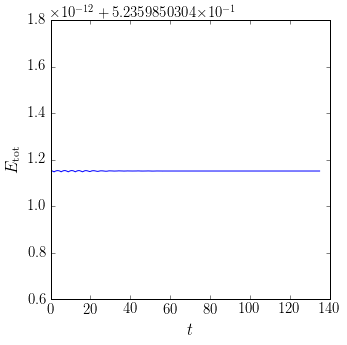

In [5]:
plot(numpy.arange(len(Et))/20.,Et)
xlabel(r'$t$')
ylabel(r'$E_{\mathrm{tot}}$')

Then we make the equivalent of Figure 1 in [Schulz et al. (2013)](http://adsabs.harvard.edu/abs/2013MNRAS.431...49S), showing the sytem's phase space at 5 different times:

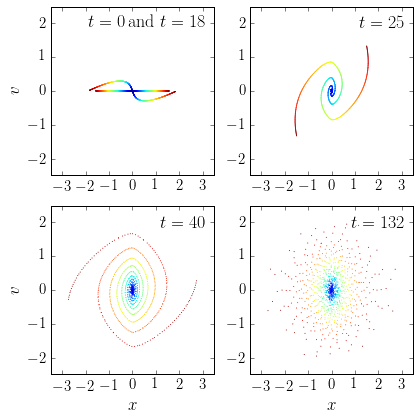

In [6]:
figsize(6,6)
subplot(2,2,1)
scatter(xt[:,0],vt[:,0],c=numpy.fabs(x),s=1.,edgecolors='None')
scatter(xt[:,360],vt[:,360],c=numpy.fabs(x),s=1.,edgecolors='None')
ylabel(r'$v$')
xlim(-3.49,3.49)
ylim(-2.49,2.49)
annotate(r'$t=0\,\mathrm{and}\ t=18$',(0.95,0.95),xycoords='axes fraction',
         horizontalalignment='right',verticalalignment='top',size=18.)
subplot(2,2,2)
scatter(xt[:,500],vt[:,500],c=numpy.fabs(x),s=1.,edgecolors='None')
xlim(-3.49,3.49)
ylim(-2.49,2.49)
annotate(r'$t=25$',(0.95,0.95),xycoords='axes fraction',
         horizontalalignment='right',verticalalignment='top',size=18.)
subplot(2,2,3)
scatter(xt[:,800],vt[:,800],c=numpy.fabs(x),s=1.,edgecolors='None')
xlabel(r'$x$')
ylabel(r'$v$')
xlim(-3.49,3.49)
ylim(-2.49,2.49)
annotate(r'$t=40$',(0.95,0.95),xycoords='axes fraction',
         horizontalalignment='right',verticalalignment='top',size=18.)
subplot(2,2,4)
scatter(xt[:,2640],vt[:,2640],c=numpy.fabs(x),s=1.,edgecolors='None')
xlabel(r'$x$')
xlim(-3.49,3.49)
ylim(-2.49,2.49)
annotate(r'$t=132$',(0.95,0.95),xycoords='axes fraction',
         horizontalalignment='right',verticalalignment='top',size=18.)
tight_layout()

We can also make a movie of the evolution of the system in phase space:

In [7]:
def init_anim_frame():
    line1= plot([],[])
    xlabel(r'$x$')
    ylabel(r'$v$')
    xlim(-3.49,3.49)
    ylim(-2.49,2.49)
    return (line1[0],)
figsize(6,4)
fig, ax= subplots()
line= ax.scatter(x,v,c=numpy.fabs(x),s=5.,edgecolors='None')
txt= ax.annotate(r'$t=%.0f$' % (0.),
                 (0.95,0.95),xycoords='axes fraction',
                 horizontalalignment='right',verticalalignment='top',size=18.)
subsamp= 4
def animate(ii):
    line.set_offsets(numpy.array([xt[:,ii*subsamp],vt[:,ii*subsamp]]).T)
    txt.set_text(r'$t=%.0f$' % (ii*subsamp/20.))
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init_anim_frame,
                               frames=nt//subsamp,interval=40,blit=True,repeat=True)
if _SAVE_GIFS:
    anim.save('schulz_sinx.gif',writer='imagemagick',dpi=80)
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out

It is clear that phase mixing happens very quickly.

We can also follow the evolution of the energy distribution of the particles. Note that even though the total energy of the system is conserved, the sum of the energies of individual particles does not have to be. The following movie shows the evolution of the energy distribution and clearly shows violent relaxation in action during the phase-mixing phase, with the energy distribution becoming much broader over this period. After phase mixing is complete, the energy distribution does not evolve substantially any longer.

In [8]:
figsize(6,4)
fig, ax= subplots()
ii= 0
Es= wendy.energy(xt[:,ii],vt[:,ii],m,individual=True)
a= ax.hist(Es,bins=31,histtype='step',range=[0.,0.004],normed=True,color='k')
ax.annotate(r'$t=0$',(0.95,0.95),xycoords='axes fraction',
             horizontalalignment='right',verticalalignment='top',size=18.)
subsamp= 4
def animate(ii):
    Es= wendy.energy(xt[:,ii*subsamp],vt[:,ii*subsamp],m,individual=True)
    ax.clear()
    a= ax.hist(Es,bins=31,histtype='step',range=[0.,0.004],normed=True,color='k')
    ax.set_xlim(0.,0.004)
    ax.set_ylim(10.,10**4.)
    ax.set_xlabel(r'$E$')
    ax.set_yscale('log')
    ax.annotate(r'$t=%.0f$' % (ii*subsamp/20.),
                (0.95,0.95),xycoords='axes fraction',
                horizontalalignment='right',verticalalignment='top',size=18.)
    return a[2]
anim = animation.FuncAnimation(fig,animate,#init_func=init_anim_frame,
                               frames=nt//subsamp,interval=40,blit=True,repeat=True)
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out

The potential evolves as follows:

In [9]:
ys= numpy.linspace(-numpy.pi,numpy.pi,1001)
def init_anim_frame():
    line1= plot([],[])
    xlabel(r'$x$')
    ylabel(r'$\Phi(x)$')
    xlim(-3.49,3.49)
    ylim(0.,3.9)
    return (line1[0],)
figsize(6,4)
fig, ax= subplots()
line,= ax.plot(ys,wendy.potential(ys,xt[:,ii],vt[:,ii],m),'k-')
txt= ax.annotate(r'$t=%.0f$' % (0.),
                 (0.95,0.95),xycoords='axes fraction',
                 horizontalalignment='right',verticalalignment='top',size=18.)
subsamp= 4
def animate(ii):
    line.set_ydata(wendy.potential(ys,xt[:,ii*subsamp],vt[:,ii*subsamp],m))
    txt.set_text(r'$t=%.0f$' % (ii*subsamp/20.))
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init_anim_frame,
                               frames=nt//subsamp,interval=40,blit=True,repeat=True)
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out

As a second example we consider the initial conditions

$x \sim [-\pi/2,\pi/2]\,,$

$v = -V_0\,\sin^3(x)+\epsilon\,V_0\,\mathcal{N}(0,1)\,,$

which are such that the system first collapses into two separate clumps that later merge (see [Schulz et al. 2013](http://adsabs.harvard.edu/abs/2013MNRAS.431...49S)).

In [10]:
N= 1001
dx= numpy.pi
V0= -0.001

x= dx*(numpy.arange(N)-N//2)/N
v= V0*numpy.sin(x)**3.+numpy.random.normal(size=N)*V0*10.**-6.
m= numpy.ones(N)/float(N)

In [11]:
g= wendy.nbody(x,v,m,0.05,maxcoll=100000000)

In [12]:
nt= 2700
xt= numpy.empty((N,nt+1))
vt= numpy.empty((N,nt+1))
Et= numpy.empty((nt+1))
xt[:,0]= x
vt[:,0]= v
Et[0]= wendy.energy(x,v,m)
for ii in tqdm.trange(nt):
    tx,tv= g.next()
    xt[:,ii+1]= tx
    vt[:,ii+1]= tv
    Et[ii+1]= wendy.energy(tx,tv,m)

We again first check that the total energy is conserved:

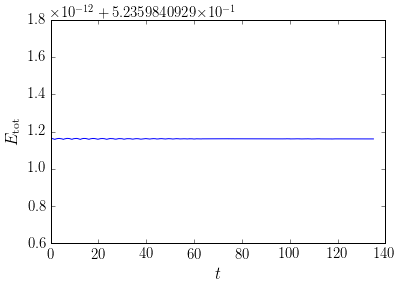

In [13]:
plot(numpy.arange(len(Et))/20.,Et)
xlabel(r'$t$')
ylabel(r'$E_{\mathrm{tot}}$')

The evolution of the system in phase space is:

In [14]:
def init_anim_frame():
    line1= plot([],[])
    xlabel(r'$x$')
    ylabel(r'$v$')
    xlim(-3.49,3.49)
    ylim(-2.49,2.49)
    return (line1[0],)
figsize(6,4)
fig, ax= subplots()
line= ax.scatter(x,v,c=numpy.fabs(x),s=5.,edgecolors='None')
txt= ax.annotate(r'$t=%.0f$' % (0.),
                 (0.95,0.95),xycoords='axes fraction',
                 horizontalalignment='right',verticalalignment='top',size=18.)
subsamp= 4
def animate(ii):
    line.set_offsets(numpy.array([xt[:,ii*subsamp],vt[:,ii*subsamp]]).T)
    txt.set_text(r'$t=%.0f$' % (ii*subsamp/20.))
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init_anim_frame,
                               frames=nt//subsamp,interval=40,blit=True,repeat=True)
if _SAVE_GIFS:
    anim.save('schulz_sin3x.gif',writer='imagemagick',dpi=80)
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out

The energy distribution evolves to a similar final state:

In [15]:
figsize(6,4)
fig, ax= subplots()
ii= 0
Es= wendy.energy(xt[:,ii],vt[:,ii],m,individual=True)
a= ax.hist(Es,bins=31,histtype='step',range=[0.,0.004],normed=True,color='k')
ax.annotate(r'$t=0$',(0.95,0.95),xycoords='axes fraction',
             horizontalalignment='right',verticalalignment='top',size=18.)
subsamp= 4
def animate(ii):
    Es= wendy.energy(xt[:,ii*subsamp],vt[:,ii*subsamp],m,individual=True)
    ax.clear()
    a= ax.hist(Es,bins=31,histtype='step',range=[0.,0.004],normed=True,color='k')
    ax.set_xlim(0.,0.004)
    ax.set_ylim(10.,10**4.)
    ax.set_xlabel(r'$E$')
    ax.set_yscale('log')
    ax.annotate(r'$t=%.0f$' % (ii*subsamp/20.),
                (0.95,0.95),xycoords='axes fraction',
                horizontalalignment='right',verticalalignment='top',size=18.)
    return a[2]
anim = animation.FuncAnimation(fig,animate,#init_func=init_anim_frame,
                               frames=nt//subsamp,interval=40,blit=True,repeat=True)
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out

The potential in this case evolves as:

In [16]:
ys= numpy.linspace(-numpy.pi,numpy.pi,1001)
def init_anim_frame():
    line1= plot([],[])
    xlabel(r'$x$')
    ylabel(r'$\Phi(x)$')
    xlim(-3.49,3.49)
    ylim(0.,3.9)
    return (line1[0],)
figsize(6,4)
fig, ax= subplots()
line,= ax.plot(ys,wendy.potential(ys,xt[:,ii],vt[:,ii],m),'k-')
txt= ax.annotate(r'$t=%.0f$' % (0.),
                 (0.95,0.95),xycoords='axes fraction',
                 horizontalalignment='right',verticalalignment='top',size=18.)
subsamp= 4
def animate(ii):
    line.set_ydata(wendy.potential(ys,xt[:,ii*subsamp],vt[:,ii*subsamp],m))
    txt.set_text(r'$t=%.0f$' % (ii*subsamp/20.))
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init_anim_frame,
                               frames=nt//subsamp,interval=40,blit=True,repeat=True)
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out